<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/states/daily"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"

#https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/
#csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv
dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [6]:
us_pop = 329968629  #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending','death', 'total']].sum()
print(res)
print(f"Current Infection Rate {res.positive/res.total*100:2f}%")
print(f"Percentage of US: {res.positive/us_pop*100:2f}%")

positive     184770
negative     864201
pending       59529
death          3746
total       1108500
dtype: int64
Current Infection Rate 16.668471%
Percentage of US: 0.055996%


In [7]:
dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(),\
  ['state', 'positive', 'negative']].sort_values(by='positive', ascending=False).head(10)

,state,positive,negative
37,NY,75795,129391
34,NJ,18696,27077
24,MI,7615,11893
5,CA,7482,21772
21,MA,6620,40315
10,FL,6338,54285
16,IL,5994,29231
20,LA,5237,33730
52,WA,4896,60566
41,PA,4843,37645


In [0]:
gbUSA = dfCovidtracking.groupby(['date'])
gbCA = dfCovidtracking[dfCovidtracking.state=='CA'].groupby(['date'])

dfUSAPos = gbUSA.positive.sum().reset_index().copy()
dfCAPos = gbCA.positive.sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 
dfUSAPos['PCT']= dfUSAPos.positive/dfUSAPos.max().positive
dfCAPos['PCT']=dfCAPos.positive/dfCAPos.max().positive

In [9]:
dfUSAPos[-7:]

,date,positive,PCT
21,20200325,63928,0.345987
22,20200326,80735,0.436949
23,20200327,99413,0.538036
24,20200328,118234,0.639898
25,20200329,139061,0.752617
26,20200330,160530,0.868810
27,20200331,184770,1.000000


In [10]:
dfCAPos[-7:]

,date,positive,PCT
21,20200325,2355,0.314755
22,20200326,3006,0.401764
23,20200327,3879,0.518444
24,20200328,4643,0.620556
25,20200329,5708,0.762898
26,20200330,6447,0.861668
27,20200331,7482,1.000000


In [11]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalized,death,total,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,
20200327,99413,527220,60094,13717.0,1530,686727,626633,367.0,3652.0,88617.0,18678.0,107295.0
20200328,118234,617470,65712,16729.0,1965,801416,735704,435.0,3012.0,90250.0,18821.0,109071.0
20200329,139061,692290,65549,19730.0,2428,896900,831351,463.0,3001.0,74820.0,20827.0,95647.0
20200330,160530,784324,65382,22303.0,2939,1010236,944854,511.0,2573.0,92034.0,21469.0,113503.0
20200331,184770,864201,59529,26660.0,3746,1108500,1048971,807.0,4357.0,79877.0,24240.0,104117.0


In [12]:
gbCA.sum()[-5:]

,positive,negative,pending,hospitalized,death,total,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,
20200327,3879,17380,57400,746.0,78,78659,21259,13.0,746.0,0.0,873.0,873.0
20200328,4643,20549,64400,1034.0,101,89592,25192,23.0,288.0,3169.0,764.0,3933.0
20200329,5708,20549,64400,1034.0,123,90657,26257,22.0,0.0,0.0,1065.0,1065.0
20200330,6447,20549,64400,1432.0,133,91396,26996,10.0,398.0,0.0,739.0,739.0
20200331,7482,21772,57400,1617.0,153,86654,29254,20.0,185.0,1223.0,1035.0,2258.0


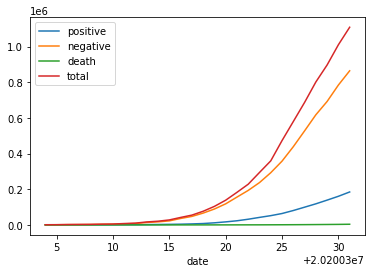

In [13]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

In [14]:
dfWHO[-14:]

,confirmed,who_deaths
date,,
20200318,3536,58
20200319,7087,100
20200320,10442,150
20200321,15219,201
20200322,15219,201
20200323,31573,402
20200324,42164,471
20200325,51914,673
20200326,63570,884


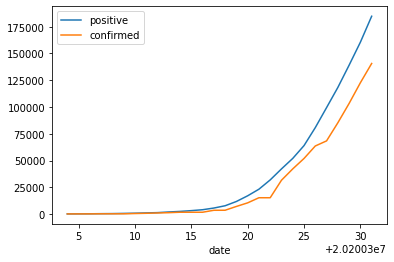

In [15]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

In [16]:
gbCA.sum()[-7:]

,positive,negative,pending,hospitalized,death,total,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,
20200325,2355,15921,48600,0.0,53,66876,18276,13.0,0.0,2469.0,253.0,2722.0
20200326,3006,17380,57400,0.0,65,77786,20386,12.0,0.0,1459.0,651.0,2110.0
20200327,3879,17380,57400,746.0,78,78659,21259,13.0,746.0,0.0,873.0,873.0
20200328,4643,20549,64400,1034.0,101,89592,25192,23.0,288.0,3169.0,764.0,3933.0
20200329,5708,20549,64400,1034.0,123,90657,26257,22.0,0.0,0.0,1065.0,1065.0
20200330,6447,20549,64400,1432.0,133,91396,26996,10.0,398.0,0.0,739.0,739.0
20200331,7482,21772,57400,1617.0,153,86654,29254,20.0,185.0,1223.0,1035.0,2258.0


In [17]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    161807
dead           2978
dtype: int64

In [18]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    7138
dead          146
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [20]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                161807
Italy             101739
Spain              87956
China              82198
Germany            66885
France             45170
Iran               41495
United Kingdom     22453
Switzerland        15922
Belgium            11899
Name: confirmed, dtype: int64

In [21]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(20)

country
US                161807
Italy             101739
Spain              87956
China              82198
Germany            66885
France             45170
Iran               41495
United Kingdom     22453
Switzerland        15922
Belgium            11899
Netherlands        11817
Turkey             10827
Korea, South        9661
Austria             9618
Canada              7398
Portugal            6408
Israel              4695
Brazil              4579
Norway              4445
Australia           4361
Name: confirmed, dtype: int64

In [0]:
dfData = dfCovidtracking.groupby('date')

In [0]:
dfStateTotal = dfCovidtracking[['state', 'positive']].groupby(by='state').max() \
.rename(columns={'positive':'current_total'})


In [0]:
dfState = dfCovidtracking[['date','state','positive']].set_index('state') \
  .join(dfStateTotal)

In [0]:
dfState['pct']=dfState.positive/dfState.current_total

In [26]:
dfState.loc['FL'].head(7)

,date,positive,current_total,pct
state,,,,
FL,20200331,6338,6338,1.000000
FL,20200330,5473,6338,0.863522
FL,20200329,4246,6338,0.669927
FL,20200328,3763,6338,0.593720
FL,20200327,2765,6338,0.436257
FL,20200326,2355,6338,0.371568
FL,20200325,1682,6338,0.265383


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

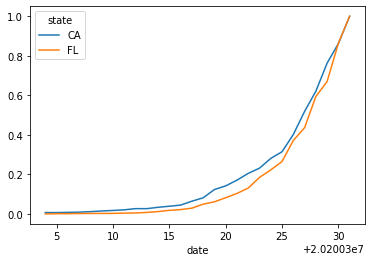

In [28]:
x = res.loc[:, ['CA','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

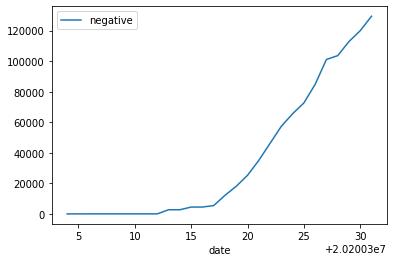

In [30]:
x = dfNYTesting.plot.line()

In [31]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['FL']))].head(10)

,state,date,positive,current_total,pct
254,FL,20200331,6338,6338,1.000000
255,FL,20200330,5473,6338,0.863522
256,FL,20200329,4246,6338,0.669927
257,FL,20200328,3763,6338,0.593720
258,FL,20200327,2765,6338,0.436257
259,FL,20200326,2355,6338,0.371568
260,FL,20200325,1682,6338,0.265383
261,FL,20200324,1412,6338,0.222783
262,FL,20200323,1171,6338,0.184759
263,FL,20200322,830,6338,0.130956


In [37]:
datecutoff = int(((pd.to_datetime(str(dfDates.date.max())))-datetime.timedelta(days=2)).strftime("%Y%m%d"))
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .60)].sort_values(by='positive',ascending=False)


,state,date,positive,current_total,pct
230,DE,20200329,232,406,0.571429
1081,PR,20200329,127,239,0.531381


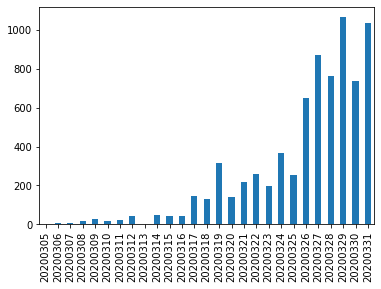

In [36]:
state = 'CA'
dfState = dfCovidtracking[dfCovidtracking.state==state].sort_values(by='date')
vals = dfState.positive.values

x=pd.Series([y-x for x,y in zip(vals,vals[1:])], \
          index = dfCovidtracking[dfCovidtracking.state==state]\
          .sort_values(by='date').date.values[1:] ) \
          .plot.bar()

